# zomato Dataset  : 
https://drive.google.com/file/d/1FSa_x3COvCoMODa44qXufO9CQb3ydqKw/view?usp=sharing

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

## Question 1

#### Bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [2]:
data=pd.read_csv(r'C:\Users\spars\OneDrive\Desktop\zomato.csv',encoding='ISO-8859-1')
data=data[data['Country Code']==1]


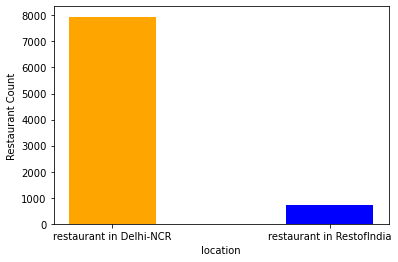

In [3]:
df=data.copy()
df1=df[(df.City=='New Delhi')|(df.City=='Ghaziabad')|(df.City=='Noida')|(df.City=='Gurgaon')|(df.City=='Faridabad')]
x=df1.City.count()  #7947
y=(df.City.count())-x  #705
l1=['restaurant in Delhi-NCR','restaurant in RestofIndia']
l2=[x,y]
plt.bar(l1,l2,width=0.4,color=['orange','blue'])
plt.xlabel('location')
plt.ylabel('Restaurant Count')
plt.show()


#### CUISINES IN RESTOFINDIA  - CUISINES IN DELHI-NCR

In [4]:
df=data.copy()
df2=df[(df.City!='New Delhi')&(df.City!='Ghaziabad')&(df.City!='Noida')&(df.City!='Gurgaon')&(df.City!='Faridabad')]
ncr_cus=df1.Cuisines
ncr=[]
roi_cus=df2.Cuisines
roi=[]
for i in ncr_cus:
    for j in i.split(','):
        ncr.append(j.strip())
for i in roi_cus:
    for j in i.split(','):
        roi.append(j.strip())
ncr_set=set(ncr)
roi_set=set(roi)
ans=roi_set-ncr_set
for i in ans:
    print(i)


German
Malwani
Cajun
BBQ


In [5]:
addr=[[28.5355, 77.3910],[28.4595, 77.0266],[28.4089, 77.3178],[28.6692, 77.4538],[28.6139, 77.2090]] #list of lat-longitude
find=[]
h={'user-key':'2745c080d8aa83a71bdcc342f3a94f6f'}
for i in range(5):
    p={'lat':addr[i][0],'lon':addr[i][1]}
    res=requests.get('https://developers.zomato.com/api/v2.1/cuisines',params=p,headers=h)
    datax=res.json()
    for i in datax['cuisines']:
        find.append(i['cuisine']['cuisine_name'])
delncr=set(find)
print(roi_set-delncr)
##the output proves that the data in the dataset is incomplete as it doesn't matches with code done above thi 

{'Cajun', 'Armenian', 'German', 'Charcoal Grill', 'Indian'}


#### Top 10 cuisines in Delhi-NCR & Rest of India

In [6]:
ans1=dict(pd.Series(ncr).value_counts().iloc[0:10])
ans2=dict(pd.Series(roi).value_counts().iloc[0:10])
print('Top 10 cuisines in Delhi-NCR')
print()
for key,value in ans1.items():
    print(key)
print()
print('Top 10 cuisines in Rest of India')
print()
for key,value in ans2.items():
    print(key)
    

Top 10 cuisines in Delhi-NCR

North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian

Top 10 cuisines in Rest of India

North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


#### plot graph to show how cuisine served is different from Delhi NCR to Rest of India

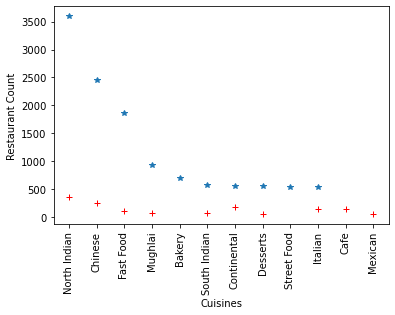

In [7]:
a=(pd.Series(ncr).value_counts().iloc[0:10].index)
b=(pd.Series(ncr).value_counts().iloc[0:10])
plt.xlabel('Cuisines')
plt.ylabel('Restaurant Count')
plt.plot(a,b,'*')
c=(pd.Series(roi).value_counts().iloc[0:10].index)
d=(pd.Series(roi).value_counts().iloc[0:10])
plt.plot(c,d,'+',color='red')
plt.xticks(rotation=90)
plt.show()

## Question 2 

In [8]:
d1=data.copy()
votes=d1['Votes']
avgcost=d1['Average Cost for two']
rating=d1['Aggregate rating']

#### Rating vs Votes

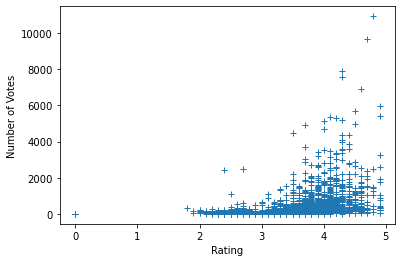

In [9]:
plt.xlabel("Rating")
plt.ylabel("Number of Votes")
plt.plot(rating,votes,'+')
plt.show()

#### Rating vs Average Cost for two

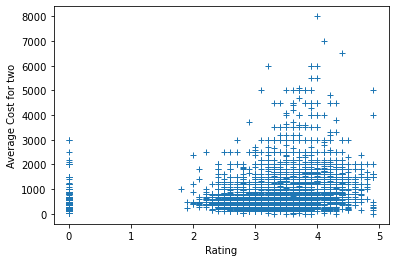

In [10]:
plt.xlabel("Rating")
plt.ylabel("Average Cost for two")
plt.plot(rating,avgcost,'+')
plt.show()

#### Rating vs Number of Cuisines

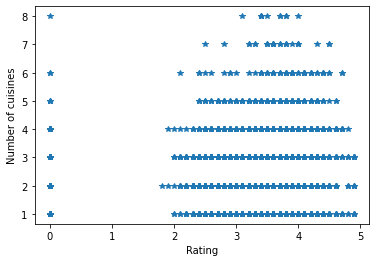

In [11]:
num_cus=d1['Cuisines']
def lengthval(i):
    l=len(i.split(','))
    return l
num_cus=num_cus.apply(lengthval)
plt.xlabel("Rating")
plt.ylabel("Number of cuisines")
plt.plot(rating,num_cus,'*')
plt.show()


#### weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating

In [12]:
d2=data.copy()
d2['weighted']=d2['Votes']*d2['Aggregate rating']
d2=d2.groupby('Locality').sum()
d2['weighted']=d2['weighted']/d2['Votes']
wtans=d2['weighted'].sort_values(ascending=False)[0:10]
value=wtans.values
ind=wtans.index
for i in range(len(value)):
    print(ind[i]," ",value[i])

Aminabad   4.9
Hotel Clarks Amer, Malviya Nagar   4.9
Friends Colony   4.886916367367881
Powai   4.841868613138686
Kirlampudi Layout   4.820161290322581
Express Avenue Mall,  Royapettah   4.8
Deccan Gymkhana   4.8
Banjara Hills   4.7187617260787995
Sector 5, Salt Lake   4.707022552098202
Riverside Mall, Gomti Nagar   4.7


## Question 3

#### Top 15 restaurants with maximum outlets

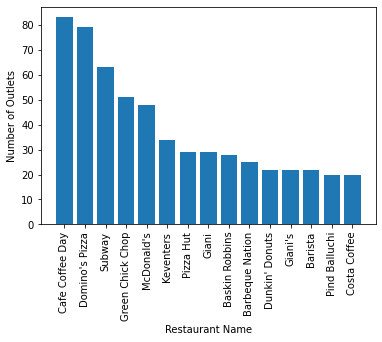

In [13]:
res_name=df['Restaurant Name'].value_counts()[0:15].index
res_ct=df['Restaurant Name'].value_counts()[0:15]
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.bar(res_name,res_ct)
plt.xticks(rotation=90)
plt.show()

#### Histogram to show Aggregate rating

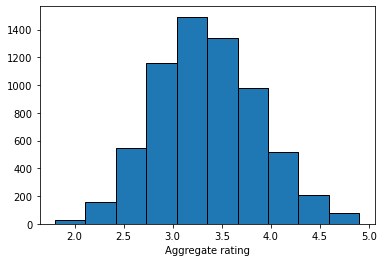

In [14]:
d3=df[df['Aggregate rating']!=0]
plt.xlabel('Aggregate rating')
plt.hist(d3['Aggregate rating'],edgecolor="black")
plt.show()


#### Top 10 restaurants in the data with the highest number of votes

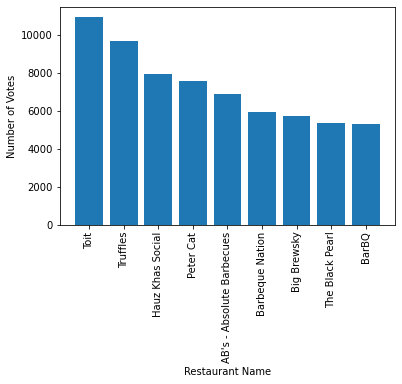

In [15]:
d4=data.copy()
d4.sort_values('Votes',inplace=True,ascending=False)
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Votes')
plt.bar(d4['Restaurant Name'].iloc[0:10],d4['Votes'].iloc[0:10])
plt.xticks(rotation=90)
plt.show()

#### top 10 cuisines present in restaurants in the USA

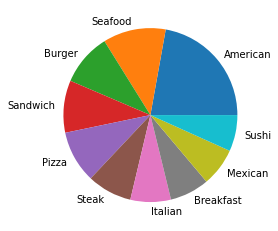

In [16]:
og=pd.read_csv(r'C:\Users\spars\OneDrive\Desktop\zomato.csv',encoding='ISO-8859-1')
ogusa=og[og['Country Code']==216]
ogusa1=ogusa.dropna(subset=['Cuisines'])
usacui=[]
for i in ogusa1.Cuisines:
    for j in i.split(','):
        usacui.append(j.strip())
plt.pie(pd.Series(usacui).value_counts().iloc[0:10],labels=pd.Series(usacui).value_counts()[0:10].index)
plt.show()

#### bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble

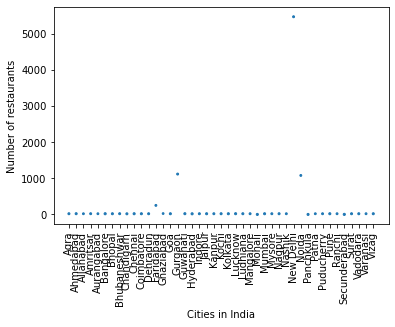

In [17]:
d5=data.copy()
d5['weighted']=d5['Votes']*d5['Aggregate rating']
num_rest=d5.groupby('City').count().Locality
sum_rest=d5.groupby('City').sum()
sum_rest['weighted']=sum_rest['weighted']/sum_rest['Votes']
plt.xlabel("Cities in India")
plt.ylabel("Number of restaurants")
plt.scatter(num_rest.index,num_rest.values,s=sum_rest.weighted)
plt.xticks(rotation=90)
plt.show()

# END